<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura_Aula_04/blob/main/dnit_dados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
base=pd.read_csv('icm_-01-2023-transparencia.csv',on_bad_lines='skip',sep=";")


In [3]:
base.columns=['UF','Rodovia','km inicial','km final','Extensão (km)','Data','Latitude','Longitude','Observação','ICMNP']


In [4]:
base2=pd.read_csv('icm_12_2022.csv',on_bad_lines='skip',sep=";")


In [5]:
base2.columns=['UF','Rodovia','km inicial','km final','Extensão (km)','Data','Latitude','Longitude','ICC','ICP','ICM']


In [6]:
#AGUPAR E EXIBIR DADOS DA BAHIA
dadosBahia22=base2.groupby(['UF'])
dadosBahia22
dadosBahia22.get_group('BA')
lat22BA=dadosBahia22.head(31)

In [7]:
dadosBahia23=base.groupby(['UF'])
dadosBahia23=dadosBahia23.get_group('BA')
dadosBahia23.describe()

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICMNP
count,31,31,31,31,31,31,31,31,0,31
unique,1,1,31,31,6,1,8,8,0,19
top,BA,BR-135,"205,800","206,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"76,250"
freq,31,31,1,1,24,31,22,22,NaN,6


In [8]:
#latitude dos trechos baianos
longitude=base.groupby(['Longitude'])
lon23BA=dadosBahia23
lon23BA.Longitude.head(31)
lon23BA.describe


<bound method NDFrame.describe of       UF Rodovia km inicial km final Extensão (km)        Data     Latitude  \
1383  BA  BR-135    205,800  206,000         0,200  24/01/2023  -12,3564116   
1384  BA  BR-135    206,000  207,000         1,000  24/01/2023  -12,3693466   
1385  BA  BR-135    207,000  208,000         1,000  24/01/2023  -12,3693466   
1386  BA  BR-135    208,000  209,000         1,000  24/01/2023  -12,3693466   
1387  BA  BR-135    209,000  210,000         1,000  24/01/2023  -12,3693466   
1388  BA  BR-135    210,000  211,000         1,000  24/01/2023  -12,3693466   
1389  BA  BR-135    211,000  212,000         1,000  24/01/2023  -12,3693466   
1390  BA  BR-135    212,000  213,000         1,000  24/01/2023  -12,3693466   
1391  BA  BR-135    213,000  214,000         1,000  24/01/2023  -12,3693466   
1392  BA  BR-135    214,000  215,000         1,000  24/01/2023  -12,3693466   
1393  BA  BR-135    215,000  216,000         1,000  24/01/2023  -12,3693466   
1394  BA  BR-135  

In [9]:

icmnp=base.groupby(['ICMNP'])
i23BA=dadosBahia23
#lat23BA.Latitude.head(31)
i23BA.describe

<bound method NDFrame.describe of       UF Rodovia km inicial km final Extensão (km)        Data     Latitude  \
1383  BA  BR-135    205,800  206,000         0,200  24/01/2023  -12,3564116   
1384  BA  BR-135    206,000  207,000         1,000  24/01/2023  -12,3693466   
1385  BA  BR-135    207,000  208,000         1,000  24/01/2023  -12,3693466   
1386  BA  BR-135    208,000  209,000         1,000  24/01/2023  -12,3693466   
1387  BA  BR-135    209,000  210,000         1,000  24/01/2023  -12,3693466   
1388  BA  BR-135    210,000  211,000         1,000  24/01/2023  -12,3693466   
1389  BA  BR-135    211,000  212,000         1,000  24/01/2023  -12,3693466   
1390  BA  BR-135    212,000  213,000         1,000  24/01/2023  -12,3693466   
1391  BA  BR-135    213,000  214,000         1,000  24/01/2023  -12,3693466   
1392  BA  BR-135    214,000  215,000         1,000  24/01/2023  -12,3693466   
1393  BA  BR-135    215,000  216,000         1,000  24/01/2023  -12,3693466   
1394  BA  BR-135  

In [10]:
dadosBahia22=base2.groupby(['UF'])
dadosBahia22=lat22BA
dadosBahia22.describe()

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
count,590,590,590,590,590,590,590,590,590,590,590
unique,20,23,359,350,17,14,162,160,20,30,115
top,PI,BR-222,"2,000","1,000","1,000",06/12/2022,0,0,"25,000","0,000","7,500"
freq,31,56,9,9,556,124,75,75,227,143,61


In [11]:
icm=base2.groupby(['ICM'])
icm22BA=dadosBahia22.describe()
#icm22BA.ICM.head(31)

In [12]:
base2['ICM'].isnull().sum()


6

In [ ]:
#
a="12,5"
b=a.replace(",",".")
b1=float(b)
b1


12.5

In [13]:
#TRANSFORMAÇÃO DOS DADOS DE STRING PRA FLOAT AGR PODE CORRELACIONAR
#i23BA['ICMNP']=i23BA['ICMNP'].apply(lambda x: str(x).replace(",",".") )
#i23BA=i23BA['ICMNP'].replace(",",".")
#i23BA.astype('Float64')
i23BA.describe

<bound method NDFrame.describe of       UF Rodovia km inicial km final Extensão (km)        Data     Latitude  \
1383  BA  BR-135    205,800  206,000         0,200  24/01/2023  -12,3564116   
1384  BA  BR-135    206,000  207,000         1,000  24/01/2023  -12,3693466   
1385  BA  BR-135    207,000  208,000         1,000  24/01/2023  -12,3693466   
1386  BA  BR-135    208,000  209,000         1,000  24/01/2023  -12,3693466   
1387  BA  BR-135    209,000  210,000         1,000  24/01/2023  -12,3693466   
1388  BA  BR-135    210,000  211,000         1,000  24/01/2023  -12,3693466   
1389  BA  BR-135    211,000  212,000         1,000  24/01/2023  -12,3693466   
1390  BA  BR-135    212,000  213,000         1,000  24/01/2023  -12,3693466   
1391  BA  BR-135    213,000  214,000         1,000  24/01/2023  -12,3693466   
1392  BA  BR-135    214,000  215,000         1,000  24/01/2023  -12,3693466   
1393  BA  BR-135    215,000  216,000         1,000  24/01/2023  -12,3693466   
1394  BA  BR-135  

In [14]:
#******************************************''DADOS DE 2022 ABAIXO''***********************************************************************
#lon23BA['Longitude']=lon23BA['Longitude'].apply(lambda x: str(x).replace(",",".") )
#lon23BA['Longitude']=lon23BA['Longitude'].astype('float64')

In [ ]:
lon23BA.describe

In [15]:
lon23BA.drop('Rodovia',axis=1)
#lon23BA.loc[:,7]=lon23BA.astype('float64')

,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICMNP
1383,BA,"205,800","206,000","0,200",24/01/2023,"-12,3564116","-44,9800283",NaN,"30,000"
1384,BA,"206,000","207,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"35,000"
1385,BA,"207,000","208,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"53,750"
1386,BA,"208,000","209,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"47,500"
1387,BA,"209,000","210,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"50,000"
1388,BA,"210,000","211,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"53,750"
1389,BA,"211,000","212,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"65,000"
1390,BA,"212,000","213,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"76,250"
1391,BA,"213,000","214,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"61,250"
1392,BA,"214,000","215,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"76,250"


In [16]:
lon23BA.drop('Rodovia',axis=1)

,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICMNP
1383,BA,"205,800","206,000","0,200",24/01/2023,"-12,3564116","-44,9800283",NaN,"30,000"
1384,BA,"206,000","207,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"35,000"
1385,BA,"207,000","208,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"53,750"
1386,BA,"208,000","209,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"47,500"
1387,BA,"209,000","210,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"50,000"
1388,BA,"210,000","211,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"53,750"
1389,BA,"211,000","212,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"65,000"
1390,BA,"212,000","213,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"76,250"
1391,BA,"213,000","214,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"61,250"
1392,BA,"214,000","215,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,"76,250"


In [17]:
lon23BA.drop('Observação',axis=1)

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICMNP
1383,BA,BR-135,"205,800","206,000","0,200",24/01/2023,"-12,3564116","-44,9800283","30,000"
1384,BA,BR-135,"206,000","207,000","1,000",24/01/2023,"-12,3693466","-44,97331","35,000"
1385,BA,BR-135,"207,000","208,000","1,000",24/01/2023,"-12,3693466","-44,97331","53,750"
1386,BA,BR-135,"208,000","209,000","1,000",24/01/2023,"-12,3693466","-44,97331","47,500"
1387,BA,BR-135,"209,000","210,000","1,000",24/01/2023,"-12,3693466","-44,97331","50,000"
1388,BA,BR-135,"210,000","211,000","1,000",24/01/2023,"-12,3693466","-44,97331","53,750"
1389,BA,BR-135,"211,000","212,000","1,000",24/01/2023,"-12,3693466","-44,97331","65,000"
1390,BA,BR-135,"212,000","213,000","1,000",24/01/2023,"-12,3693466","-44,97331","76,250"
1391,BA,BR-135,"213,000","214,000","1,000",24/01/2023,"-12,3693466","-44,97331","61,250"
1392,BA,BR-135,"214,000","215,000","1,000",24/01/2023,"-12,3693466","-44,97331","76,250"


In [18]:
dadosBahia22.dtypes

UF               object
Rodovia          object
km inicial       object
km final         object
Extensão (km)    object
Data             object
Latitude         object
Longitude        object
ICC              object
ICP              object
ICM              object
dtype: object

In [19]:
dadosBahia22.drop('Rodovia',axis=1)

,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
3,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
6,PA,"115,000","116,000","1,000",23/12/2022,"-5,1413601","-49,3520482","25,000","0,000","7,500"
7,PA,"116,000","117,000","1,000",23/12/2022,"-5,1413601","-49,3520482","25,000","0,000","7,500"
8,PA,"117,000","118,000","1,000",23/12/2022,"-5,1413601","-49,3520482","25,000","0,000","7,500"
9,PA,"118,000","119,000","1,000",23/12/2022,"-5,1413601","-49,3520482","25,000","0,000","7,500"
...,...,...,...,...,...,...,...,...,...,...
20868,RN,"58,000","59,000","1,000",12/12/2022,"-5,9187948","-35,5327786","20,000","10,000","13,000"
20870,RN,"59,000","60,000","1,000",12/12/2022,"-5,9187948","-35,5327786","20,000","20,000","20,000"
20872,RN,"60,000","61,000","1,000",12/12/2022,"-5,9187948","-35,5327786","20,000","5,000","9,500"
20874,RN,"61,000","62,000","1,000",12/12/2022,"-5,9187948","-35,5327786","20,000","40,000","34,000"


In [21]:
bahia=dadosBahia22.groupby(['UF'])
bahia=bahia.get_group('BA')
bahia.describe

<bound method NDFrame.describe of       UF Rodovia km inicial km final Extensão (km)        Data     Latitude  \
9511  BA  BR-242    538,500  539,000         0,500  08/12/2022   -12,195745   
9512  BA  BR-242    539,000  540,000         1,000  08/12/2022  -12,2463916   
9513  BA  BR-242    540,000  541,000         1,000  08/12/2022  -12,2463916   
9514  BA  BR-242    541,000  542,000         1,000  08/12/2022  -12,2463916   
9515  BA  BR-242    542,000  543,000         1,000  08/12/2022  -12,2463916   
9516  BA  BR-242    543,000  544,000         1,000  08/12/2022  -12,2463916   
9517  BA  BR-242    544,000  545,000         1,000  08/12/2022  -12,2463916   
9518  BA  BR-242    545,000  546,000         1,000  08/12/2022  -12,2463916   
9519  BA  BR-242    546,000  547,000         1,000  08/12/2022  -12,2463916   
9520  BA  BR-242    547,000  548,000         1,000  08/12/2022  -12,2463916   
9521  BA  BR-242    548,000  549,000         1,000  08/12/2022  -12,2463916   
9522  BA  BR-242  

In [22]:
bahia.drop('UF',axis=1)

,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
9511,BR-242,"538,500","539,000","0,500",08/12/2022,"-12,195745","-43,70278","65,000","20,000","33,500"
9512,BR-242,"539,000","540,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9513,BR-242,"540,000","541,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9514,BR-242,"541,000","542,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","7,500","17,250"
9515,BR-242,"542,000","543,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9516,BR-242,"543,000","544,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9517,BR-242,"544,000","545,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9518,BR-242,"545,000","546,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"
9519,BR-242,"546,000","547,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9520,BR-242,"547,000","548,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"


In [23]:
bahia.drop('Rodovia',axis=1)

,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
9511,BA,"538,500","539,000","0,500",08/12/2022,"-12,195745","-43,70278","65,000","20,000","33,500"
9512,BA,"539,000","540,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9513,BA,"540,000","541,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9514,BA,"541,000","542,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","7,500","17,250"
9515,BA,"542,000","543,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9516,BA,"543,000","544,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9517,BA,"544,000","545,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9518,BA,"545,000","546,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"
9519,BA,"546,000","547,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9520,BA,"547,000","548,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"


In [24]:
bahia.drop('UF',axis=1)

,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICC,ICP,ICM
9511,BR-242,"538,500","539,000","0,500",08/12/2022,"-12,195745","-43,70278","65,000","20,000","33,500"
9512,BR-242,"539,000","540,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9513,BR-242,"540,000","541,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","5,000","15,500"
9514,BR-242,"541,000","542,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","7,500","17,250"
9515,BR-242,"542,000","543,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9516,BR-242,"543,000","544,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9517,BR-242,"544,000","545,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","50,000","47,000"
9518,BR-242,"545,000","546,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"
9519,BR-242,"546,000","547,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","40,000","40,000"
9520,BR-242,"547,000","548,000","1,000",08/12/2022,"-12,2463916","-42,7666333","40,000","52,500","48,750"


In [25]:
lon23BA['ICMNP']=lon23BA['ICMNP'].apply(lambda x: str(x).replace(",",".") )
#lon23BA['Longitude']=lon23BA['Longitude'].astype('float64')

<ipython-input-25-97ce439f0967>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon23BA['ICMNP']=lon23BA['ICMNP'].apply(lambda x: str(x).replace(",",".") )


In [26]:
lon23BA['ICMNP']=lon23BA['ICMNP'].astype('float64')

<ipython-input-26-f7b53a27c5d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon23BA['ICMNP']=lon23BA['ICMNP'].astype('float64')


In [27]:
lon23BA.drop('Rodovia',axis=1)

,UF,km inicial,km final,Extensão (km),Data,Latitude,Longitude,Observação,ICMNP
1383,BA,"205,800","206,000","0,200",24/01/2023,"-12,3564116","-44,9800283",NaN,30.00
1384,BA,"206,000","207,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,35.00
1385,BA,"207,000","208,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,53.75
1386,BA,"208,000","209,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,47.50
1387,BA,"209,000","210,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,50.00
1388,BA,"210,000","211,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,53.75
1389,BA,"211,000","212,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,65.00
1390,BA,"212,000","213,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,76.25
1391,BA,"213,000","214,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,61.25
1392,BA,"214,000","215,000","1,000",24/01/2023,"-12,3693466","-44,97331",NaN,76.25


In [28]:
lon23BA.drop('Observação',axis=1)

,UF,Rodovia,km inicial,km final,Extensão (km),Data,Latitude,Longitude,ICMNP
1383,BA,BR-135,"205,800","206,000","0,200",24/01/2023,"-12,3564116","-44,9800283",30.00
1384,BA,BR-135,"206,000","207,000","1,000",24/01/2023,"-12,3693466","-44,97331",35.00
1385,BA,BR-135,"207,000","208,000","1,000",24/01/2023,"-12,3693466","-44,97331",53.75
1386,BA,BR-135,"208,000","209,000","1,000",24/01/2023,"-12,3693466","-44,97331",47.50
1387,BA,BR-135,"209,000","210,000","1,000",24/01/2023,"-12,3693466","-44,97331",50.00
1388,BA,BR-135,"210,000","211,000","1,000",24/01/2023,"-12,3693466","-44,97331",53.75
1389,BA,BR-135,"211,000","212,000","1,000",24/01/2023,"-12,3693466","-44,97331",65.00
1390,BA,BR-135,"212,000","213,000","1,000",24/01/2023,"-12,3693466","-44,97331",76.25
1391,BA,BR-135,"213,000","214,000","1,000",24/01/2023,"-12,3693466","-44,97331",61.25
1392,BA,BR-135,"214,000","215,000","1,000",24/01/2023,"-12,3693466","-44,97331",76.25


In [ ]:
#l=lon23BA[['Longitude']].astype('float64')

In [29]:
j=lon23BA[['ICMNP']].astype('float64')

In [30]:
lon23BA['Latitude']=lon23BA['Latitude'].apply(lambda x: str(x).replace(",",".") )

<ipython-input-30-5d55a2d68868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon23BA['Latitude']=lon23BA['Latitude'].apply(lambda x: str(x).replace(",",".") )


In [31]:
lon23BA['Latitude'].astype('float64')

1383   -12.356412
1384   -12.369347
1385   -12.369347
1386   -12.369347
1387   -12.369347
1388   -12.369347
1389   -12.369347
1390   -12.369347
1391   -12.369347
1392   -12.369347
1393   -12.369347
1394   -12.369347
1395   -12.369347
1396   -12.369347
1397   -12.369347
1398   -12.369347
1399   -12.369347
1400   -12.369347
1401   -12.369347
1402   -12.369347
1403   -12.369347
1404   -12.369347
1405   -12.369347
1406   -13.044042
1407   -13.045950
1408   -13.154282
1409   -13.157367
1410   -13.157367
1411   -13.165705
1412   -13.183077
1413   -13.183077
Name: Latitude, dtype: float64

In [32]:
lon23BA['Data'].astype('object')

1383    24/01/2023
1384    24/01/2023
1385    24/01/2023
1386    24/01/2023
1387    24/01/2023
1388    24/01/2023
1389    24/01/2023
1390    24/01/2023
1391    24/01/2023
1392    24/01/2023
1393    24/01/2023
1394    24/01/2023
1395    24/01/2023
1396    24/01/2023
1397    24/01/2023
1398    24/01/2023
1399    24/01/2023
1400    24/01/2023
1401    24/01/2023
1402    24/01/2023
1403    24/01/2023
1404    24/01/2023
1405    24/01/2023
1406    24/01/2023
1407    24/01/2023
1408    24/01/2023
1409    24/01/2023
1410    24/01/2023
1411    24/01/2023
1412    24/01/2023
1413    24/01/2023
Name: Data, dtype: object

In [33]:
lon23BA['Data']=lon23BA['Data'].apply(lambda x: str(x).replace('01','24/01/2023') )

<ipython-input-33-5b5857e65cc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lon23BA['Data']=lon23BA['Data'].apply(lambda x: str(x).replace('01','24/01/2023') )


In [34]:
pergunta=lon23BA.iloc[:,0].values
resposta=j.iloc[:,0].values

In [35]:
lon23BA['Data'].describe

<bound method NDFrame.describe of 1383    24/24/01/2023/2023
1384    24/24/01/2023/2023
1385    24/24/01/2023/2023
1386    24/24/01/2023/2023
1387    24/24/01/2023/2023
1388    24/24/01/2023/2023
1389    24/24/01/2023/2023
1390    24/24/01/2023/2023
1391    24/24/01/2023/2023
1392    24/24/01/2023/2023
1393    24/24/01/2023/2023
1394    24/24/01/2023/2023
1395    24/24/01/2023/2023
1396    24/24/01/2023/2023
1397    24/24/01/2023/2023
1398    24/24/01/2023/2023
1399    24/24/01/2023/2023
1400    24/24/01/2023/2023
1401    24/24/01/2023/2023
1402    24/24/01/2023/2023
1403    24/24/01/2023/2023
1404    24/24/01/2023/2023
1405    24/24/01/2023/2023
1406    24/24/01/2023/2023
1407    24/24/01/2023/2023
1408    24/24/01/2023/2023
1409    24/24/01/2023/2023
1410    24/24/01/2023/2023
1411    24/24/01/2023/2023
1412    24/24/01/2023/2023
1413    24/24/01/2023/2023
Name: Data, dtype: object>

In [ ]:
#pergunta=np.cov(lon23BA.astype(float), rowvar=False)
np.corrcoef(pergunta,resposta)

In [ ]:
pergunta= pergunta.reshape(-1, 1) 
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(pergunta, resposta)

In [ ]:
# Visualização dos coeficientes
modelo.intercept_

-6623.785549744107

In [ ]:
#inclinacao
modelo.coef_

array([-148.74474161])

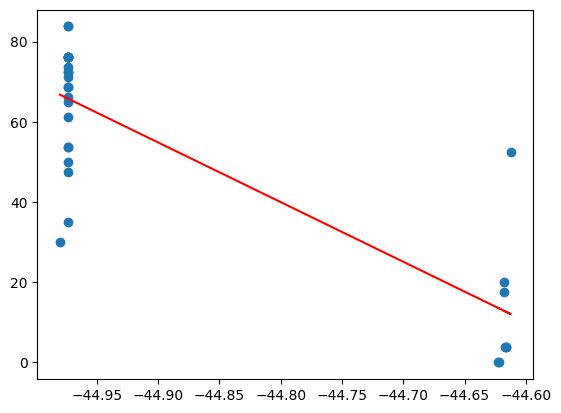

In [ ]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(pergunta, resposta)
plt.plot(pergunta, modelo.predict(pergunta), color = 'red')

In [ ]:
modelo.intercept_ + modelo.coef_ * 30.00

array([-11086.12779801])